In [1]:
import os
import pandas as pd
from datetime import date

In [2]:
start_day = date.today()
end_date = start_day
print(end_date)

2022-04-04


In [3]:
search_term = '#bankofamerica'
from_date = '2022-03-03'

In [4]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")


0

In [5]:
if os.stat("result-tweets.txt").st_size == 0:
          counter = 0
else: 
          df = pd.read_csv('result-tweets.txt', names=['link'])
          counter = df.size
          


In [6]:
print('Number of Tweets : ' + str(counter))

Number of Tweets : 884


In [7]:
max_results = 150

In [8]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
    print("No tweets found")
else: 
    df = pd.read_csv('extracted-tweets.txt', names=['content'])
    for row in df['content'].iteritems():
        print(row)

(0, "'Bank of America https://t.co/vwFZKh5O8A #BankofAmerica'")
(1, "'“Iron Mike” Tyson &amp; Bank of America (BoA) Back Solana (SOL) | by Stephen Dalton | B.O.S.S. |Medium - via @pensignal  https://t.co/4cgUKApzzB $SOL #Solana #BankofAmerica #MikeTyson @MikeTyson #cryptocurrencies  #writingservices #writerscommunity #medium #writerslift #SEO #Blogging'")
(2, "'GameStop Stock Split Plan Announced: What You Need to Know #boardofdirectors #whatyouneed #bankofamerica #splitin #gamestop #stocksplit https://t.co/un5aS9tQYe'")
(3, "'“Iron Mike” Tyson &amp; Bank of America (BoA) Back Solana (SOL) | by Stephen Dalton | B.O.S.S. |Medium - via @pensignal  https://t.co/JCPK8FlDtT $SOL #Solana #BankofAmerica #MikeTyson @MikeTyson #cryptocurrencies  #writingservices #writerscommunity #medium #writerslift #SEO #Blogging'")
(4, "'#JPMorgan #Chase #WellsFargo #Citi #BankofAmerica\\n\\nProvided $742bn of financing to coal oil and gas last year (FT)\\n\\nAll members of so called “Net zero banking allian

In [9]:
df.head(3)

,content
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...
2,'GameStop Stock Split Plan Announced: What You...


In [10]:

import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yixuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yixuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yixuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yixuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
df['stopwords'] = df['content'].apply(lambda x: len([x for x in x.split() if x in stop]))


In [12]:
df[['content','stopwords']].head()

,content,stopwords
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...,1
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,2
2,'GameStop Stock Split Plan Announced: What You...,1
3,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,2
4,'#JPMorgan #Chase #WellsFargo #Citi #BankofAme...,12


In [13]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

In [14]:
df['punctuation'] = df['content'].apply(lambda x: count_punct(x))

In [15]:
df[['content','punctuation']].head()

,content,punctuation
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...,8
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,34
2,'GameStop Stock Split Plan Announced: What You...,14
3,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,34
4,'#JPMorgan #Chase #WellsFargo #Citi #BankofAme...,19


In [16]:
df['hastags'] = df['content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [17]:
df[['content','hastags']].head()

,content,hastags
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...,1
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,10
2,'GameStop Stock Split Plan Announced: What You...,6
3,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,10
4,'#JPMorgan #Chase #WellsFargo #Citi #BankofAme...,4


In [18]:
df.hastags.loc[df.hastags != 0].count()

98

In [19]:
df['numerics'] = df['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


In [20]:
df[['content','numerics']].head()

,content,numerics
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...,0
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,0
2,'GameStop Stock Split Plan Announced: What You...,0
3,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,0
4,'#JPMorgan #Chase #WellsFargo #Citi #BankofAme...,0


In [21]:
df['upper'] = df['content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [22]:
df[['content','upper']].head()

,content,upper
0,'Bank of America https://t.co/vwFZKh5O8A #Bank...,0
1,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,4
2,'GameStop Stock Split Plan Announced: What You...,0
3,'“Iron Mike” Tyson &amp; Bank of America (BoA)...,4
4,'#JPMorgan #Chase #WellsFargo #Citi #BankofAme...,0


In [23]:
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    'bank of america https://t.co/vwfzkh5o8a #bank...
1    '“iron mike” tyson &amp; bank of america (boa)...
2    'gamestop stock split plan announced: what you...
3    '“iron mike” tyson &amp; bank of america (boa)...
4    '#jpmorgan #chase #wellsfargo #citi #bankofame...
Name: content, dtype: object

In [24]:
df['content'] = df['content'].str.replace('[^\w\s]','')
df['content'].head()

<ipython-input-24-9e5ee19e9252>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')


0     bank of america httpstcovwfzkh5o8a bankofamerica
1    iron mike tyson amp bank of america boa back s...
2    gamestop stock split plan announced what you n...
3    iron mike tyson amp bank of america boa back s...
4    jpmorgan chase wellsfargo citi bankofamericann...
Name: content, dtype: object

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
df['content'].sample(10)

101    im still waiting get unemployment money back b...
140                     ethereum surpasses bankofamerica
113                          bac fwp bank america 25 mar
138        bank america httpstco4ermgxiqz6 bankofamerica
127    perfect storm fueling energy upside says bofas...
67     bac uptrend price may ascend result broken low...
32                                                  fk u
146                     ethereum surpasses bankofamerica
118    bankofamerica shitting little guy whats boa story
7      bankofamerica worst banking experience ever ba...
Name: content, dtype: object

In [27]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [28]:
import re
import string

df['content'] = df['content'].apply(lambda x: remove_url(x))

In [29]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [30]:
df['content'] = df['content'].apply(lambda x: remove_html(x))

In [37]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [32]:
# remove all emojis from df
df['content'] = df['content'].apply(lambda x: remove_emoji(x))

In [41]:
from textblob import TextBlob
df['content'][:5].apply(lambda x: str(TextBlob(x).correct()))

0        bank america httpstcovwfzkh5o8a bankofamerica
1    iron mike son amp bank america boa back poland...
2    gamestop stock split plan announced need know ...
3    iron mike son amp bank america boa back poland...
4    morgan chase wellsfargo city bankofamericannpr...
Name: content, dtype: object

In [42]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [45]:
df['content'] = df.content.apply(round1)


In [46]:
df.content

0                            bank america  bankofamerica
1      iron mike tyson amp bank america boa back sola...
2      gamestop stock split plan announced need know ...
3      iron mike tyson amp bank america boa back sola...
4      jpmorgan chase wellsfargo citi bankofamericann...
                             ...                        
145    ethereum overall market cap skyrocketed outpac...
146                     ethereum surpasses bankofamerica
147    amazing get riskfree  citi nnim going smoke in...
148               bankofamerica fraud department morning
149    bac login generalnnis bankofamerica ddos attac...
Name: content, Length: 150, dtype: object

In [47]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [48]:
df['content'] = df.content.apply(round2)
df.content

0                            bank america  bankofamerica
1      iron mike tyson amp bank america boa back sola...
2      gamestop stock split plan announced need know ...
3      iron mike tyson amp bank america boa back sola...
4      jpmorgan chase wellsfargo citi bankofamericann...
                             ...                        
145    ethereum overall market cap skyrocketed outpac...
146                     ethereum surpasses bankofamerica
147    amazing get riskfree  citi nnim going smoke in...
148               bankofamerica fraud department morning
149    bac login generalnnis bankofamerica ddos attac...
Name: content, Length: 150, dtype: object

In [49]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()[:20]
freq

bankofamerica    103
bank              51
america           38
bac               25
sol               14
miketyson         14
medium            14
solana            14
de                14
boa               12
one               12
money             11
la                11
stock             10
back              10
company           10
amp                9
inc                8
mike               8
ethereum           8
dtype: int64

In [51]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split(" ")))
df[['content','word_count']].head()

,content,word_count
0,bank america bankofamerica,4
1,iron mike tyson amp bank america boa back sola...,29
2,gamestop stock split plan announced need know ...,14
3,iron mike tyson amp bank america boa back sola...,29
4,jpmorgan chase wellsfargo citi bankofamericann...,26


In [52]:
null_values=df.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
content,0,0.0
stopwords,0,0.0
punctuation,0,0.0
hastags,0,0.0
numerics,0,0.0
upper,0,0.0
word_count,0,0.0


In [53]:
df['char_count'] = df['content'].str.len() ## this also includes spaces
df[['content','char_count']].head()

,content,char_count
0,bank america bankofamerica,27
1,iron mike tyson amp bank america boa back sola...,221
2,gamestop stock split plan announced need know ...,117
3,iron mike tyson amp bank america boa back sola...,221
4,jpmorgan chase wellsfargo citi bankofamericann...,199


In [54]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))

In [55]:
df['avg_word'] = df['content'].apply(lambda x: avg_word(x)).round(1)
df[['content','avg_word']].head()

,content,avg_word
0,bank america bankofamerica,8.0
1,iron mike tyson amp bank america boa back sola...,6.9
2,gamestop stock split plan announced need know ...,8.0
3,iron mike tyson amp bank america boa back sola...,6.9
4,jpmorgan chase wellsfargo citi bankofamericann...,7.0


In [57]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()[:50]
freq

bankofamerica       103
bank                 51
america              38
bac                  25
sol                  14
miketyson            14
medium               14
solana               14
de                   14
boa                  12
one                  12
money                11
la                   11
stock                10
back                 10
company              10
amp                   9
inc                   8
mike                  8
ethereum              8
like                  8
tyson                 7
via                   7
blogging              7
bofa                  7
pensignal             7
writingservices       7
cryptocurrencies      7
seo                   7
boss                  7
writerscommunity      7
writerslift           7
dalton                7
stephen               7
uptrend               7
iron                  7
cupcakes              6
stockmarket           6
march                 6
turning               6
get                   6
largest         

In [58]:
add_words = [     
"de",     
"la",           
]

stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(add_words)

In [59]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))

In [60]:
df['content'].sample(10)

49     bank america awards million grant detroit empl...
90     bac bankofamerica täglich wir befinden uns der...
98                                                  like
12                    bank stocks took large hit week ry
65     bac enters bearish trend bankofamerica stockma...
31                          one company turning cupcakes
47     γιατί η bankofamerica έχει ελκυστικό μέρισμα κ...
48     iron mike tyson amp bank america boa back sola...
67     bac uptrend price may ascend result broken low...
143    days til bankofamerica chimarathon miles justi...
Name: content, dtype: object

In [61]:
df1= df

In [63]:
mask = df1.content.str.endswith('de') 
df1.loc[mask, 'content'] = df1.loc[mask, 'content'].str[:-2]

In [66]:
df1.loc[df1.punctuation >= 4].content.tolist()

['bank america bankofamerica',
 'iron mike tyson amp bank america boa back solana sol stephen dalton boss medium via pensignal sol solana bankofamerica miketyson miketyson cryptocurrencies writingservices writerscommunity medium writerslift seo blogging',
 'gamestop stock split plan announced need know boardofdirectors whatyouneed bankofamerica splitin gamestop stocksplit',
 'iron mike tyson amp bank america boa back solana sol stephen dalton boss medium via pensignal sol solana bankofamerica miketyson miketyson cryptocurrencies writingservices writerscommunity medium writerslift seo blogging',
 'jpmorgan chase wellsfargo citi bankofamericannprovided financing coal oil gas last year ftnnall members called net zero banking alliancennthe net zero much fossil fuel leave groundnnclimatecriminals',
 'bank america bankofamerica',
 'nbankofamerica',
 'bankofamerica promises showing clips next marvel moviennwhen uber lyft going start shuttling peoples money themnnmilliondollaridea httpstcoozvs

In [68]:
df.loc[df.punctuation > 4].content.tolist()

['bank america bankofamerica',
 'iron mike tyson amp bank america boa back solana sol stephen dalton boss medium via pensignal sol solana bankofamerica miketyson miketyson cryptocurrencies writingservices writerscommunity medium writerslift seo blogging',
 'gamestop stock split plan announced need know boardofdirectors whatyouneed bankofamerica splitin gamestop stocksplit',
 'iron mike tyson amp bank america boa back solana sol stephen dalton boss medium via pensignal sol solana bankofamerica miketyson miketyson cryptocurrencies writingservices writerscommunity medium writerslift seo blogging',
 'jpmorgan chase wellsfargo citi bankofamericannprovided financing coal oil gas last year ftnnall members called net zero banking alliancennthe net zero much fossil fuel leave groundnnclimatecriminals',
 'bank america bankofamerica',
 'bankofamerica promises showing clips next marvel moviennwhen uber lyft going start shuttling peoples money themnnmilliondollaridea httpstcoozvsnmpodk',
 'first we

In [69]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()[:50]
freq

bankofamerica       103
bank                 51
america              38
bac                  25
miketyson            14
solana               14
sol                  14
medium               14
boa                  12
one                  12
money                11
stock                10
company              10
back                 10
amp                   9
like                  8
ethereum              8
inc                   8
mike                  8
boss                  7
cryptocurrencies      7
via                   7
bofa                  7
tyson                 7
writingservices       7
pensignal             7
blogging              7
seo                   7
iron                  7
stephen               7
writerscommunity      7
writerslift           7
dalton                7
uptrend               7
cupcakes              6
get                   6
march                 6
day                   6
price                 6
banking               6
stockmarket           6
largest         

In [101]:
new_data = pd.DataFrame(freq)

In [103]:
new_data['keywords'] = freq.index

In [104]:
new_data

,0,keywords
bankofamerica,103,bankofamerica
bank,51,bank
america,38,america
bac,25,bac
miketyson,14,miketyson
solana,14,solana
sol,14,sol
medium,14,medium
boa,12,boa
one,12,one


In [107]:
w = wordcloud.WordCloud(background_color="white")  


In [122]:

def newsfunction(a):
    res = str()
    for i in a:
        res +=','
        res += i
    return ''.join(res)
    
    

In [123]:
abc = newsfunction(new_data['keywords'])
abc 

',bankofamerica,bank,america,bac,miketyson,solana,sol,medium,boa,one,money,stock,company,back,amp,like,ethereum,inc,mike,boss,cryptocurrencies,via,bofa,tyson,writingservices,pensignal,blogging,seo,iron,stephen,writerscommunity,writerslift,dalton,uptrend,cupcakes,get,march,day,price,banking,stockmarket,largest,turning,band,bollinger,eth,lower,corp,enters,banks'

In [124]:
w.generate(abc)

In [125]:
w.to_file("pywordcloud2.png")

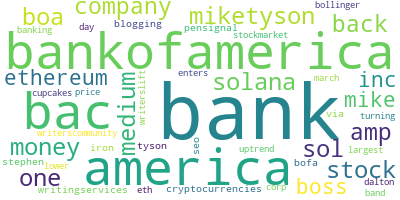